#Milin Desai
#CSC 578 HW-6 Fall 2020

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [83]:
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
import pandas as pd
print(tf.__version__) # check the TF version!

2.5.0-dev20201107


In [3]:
## For TF version 2 (just one line)
from tensorflow.keras import datasets, layers, models

## For TF version 1 (need both lines)
#from tensorflow import keras
#from keras import datasets, layers, models

In [4]:
# Download the data from the repository site.
(train_all_images, train_all_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [5]:
# !! DO NOT REMOVE THIS LINE !!
# Delete test_labels (by making it an empty list) so that we don't accidentally
# use it in the code.
test_labels = []

# Then split the training set ('train_all') into two subsets: train and 
# validation.  After that, we have 3 subsets: train, validation and test.

from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by using stratefied sampling.  
train_images, valid_images, train_labels, valid_labels \
  = train_test_split(train_all_images, train_all_labels,
                     stratify=train_all_labels, test_size=0.2)

In [6]:
train_images, valid_images, test_images \
  = train_images / 255.0, valid_images / 255.0, test_images / 255.0

In [7]:
train_labels

array([[1],
       [1],
       [8],
       ...,
       [1],
       [5],
       [8]], dtype=uint8)

In [8]:
valid_labels

array([[5],
       [1],
       [0],
       ...,
       [3],
       [1],
       [5]], dtype=uint8)

Verify the data

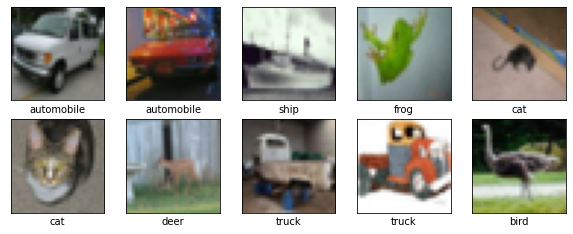

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 5/2020 nt: as noted above

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])


In [15]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.8135 - accuracy: 0.3310 - val_loss: 1.3273 - val_accuracy: 0.5170
Epoch 2/10
1250/1250 [==============================] - 17s 13ms/step - loss: 1.2690 - accuracy: 0.5476 - val_loss: 1.1549 - val_accuracy: 0.5864
Epoch 3/10
1250/1250 [==============================] - 16s 13ms/step - loss: 1.0924 - accuracy: 0.6103 - val_loss: 1.0711 - val_accuracy: 0.6202
Epoch 4/10
1250/1250 [==============================] - 17s 13ms/step - loss: 0.9817 - accuracy: 0.6529 - val_loss: 1.0885 - val_accuracy: 0.6163
Epoch 5/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8932 - accuracy: 0.6869 - val_loss: 0.9470 - val_accuracy: 0.6668
Epoch 6/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8371 - accuracy: 0.7073 - val_loss: 0.9254 - val_accuracy: 0.6822
Epoch 7/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.7729 - accuracy: 0.7266 - val_loss: 0.9167 -

313/313 - 0s - loss: 0.9459 - accuracy: 0.6869
valid_accuracy=0.6869000196456909, valid_loss=0.9458946585655212


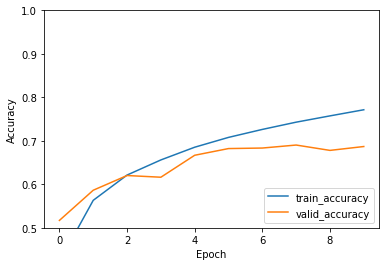

In [16]:
plt.plot(history.history['accuracy'], label='train_accuracy') # For TF2
#plt.plot(history.history['acc'], label='train_accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid_accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid_accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) # 5/2020 nt: use validation set
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

Prediction for test image

In [72]:
model.predict(test_images)

array([[1.45677652e-03, 2.16026692e-05, 2.22410318e-02, ...,
        8.46674200e-03, 1.13546411e-02, 5.07477904e-04],
       [1.46773040e-01, 4.63907085e-02, 1.05475905e-04, ...,
        2.98203986e-06, 7.83873141e-01, 2.28488483e-02],
       [7.00921863e-02, 8.02806485e-03, 1.02692407e-04, ...,
        1.24921235e-05, 9.21029449e-01, 6.72958966e-04],
       ...,
       [3.22891610e-05, 4.20022218e-07, 6.68146238e-02, ...,
        9.09984205e-03, 5.48002208e-06, 1.76766735e-05],
       [3.75421703e-01, 3.92709553e-01, 4.39939871e-02, ...,
        6.86857558e-04, 2.02767011e-02, 2.39570579e-03],
       [3.24607208e-05, 2.12385166e-05, 8.92855023e-05, ...,
        9.30286348e-01, 8.48671789e-07, 1.01510686e-05]], dtype=float32)

## Best Model

In [127]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(68, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(72, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(86, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 5/2020 nt: as noted above

In [128]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 13, 13, 68)        39236     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 6, 6, 68)          0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 4, 4, 72)          44136     
_________________________________________________________________
flatten_24 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 86)              

In [129]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])

In [130]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 49s 39ms/step - loss: 1.8056 - accuracy: 0.3351 - val_loss: 1.2598 - val_accuracy: 0.5517
Epoch 2/10
1250/1250 [==============================] - 52s 42ms/step - loss: 1.2162 - accuracy: 0.5663 - val_loss: 1.0996 - val_accuracy: 0.6136
Epoch 3/10
1250/1250 [==============================] - 52s 42ms/step - loss: 1.0325 - accuracy: 0.6365 - val_loss: 0.9908 - val_accuracy: 0.6495
Epoch 4/10
1250/1250 [==============================] - 52s 42ms/step - loss: 0.9002 - accuracy: 0.6830 - val_loss: 0.9646 - val_accuracy: 0.6545
Epoch 5/10
1250/1250 [==============================] - 153s 122ms/step - loss: 0.8035 - accuracy: 0.7193 - val_loss: 0.8971 - val_accuracy: 0.6920
Epoch 6/10
1250/1250 [==============================] - 77s 62ms/step - loss: 0.7336 - accuracy: 0.7451 - val_loss: 0.9088 - val_accuracy: 0.6874
Epoch 7/10
1250/1250 [==============================] - 175s 140ms/step - loss: 0.6720 - accuracy: 0.7635 - val_loss: 0.90

313/313 - 1s - loss: 0.9444 - accuracy: 0.7025
valid_accuracy=0.7024999856948853, valid_loss=0.9444282054901123


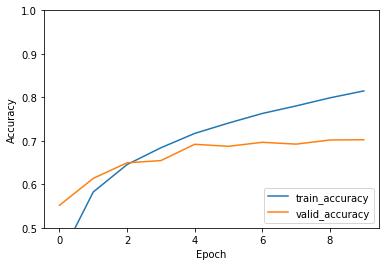

In [142]:
plt.plot(history.history['accuracy'], label='train_accuracy') # For TF2
plt.plot(history.history['val_accuracy'], label = 'valid_accuracy') # For TF2
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) # 5/2020 nt: use validation set
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

In [172]:
predictions = model.predict(test_images)
predictions

array([[4.89799399e-03, 1.05736498e-03, 2.23650411e-03, ...,
        3.19682789e-04, 3.53670940e-02, 1.27430030e-04],
       [1.16163086e-04, 2.73951236e-02, 6.23208294e-08, ...,
        2.42601989e-12, 9.72482085e-01, 6.40616872e-06],
       [1.12740276e-02, 4.49901167e-03, 1.15031097e-03, ...,
        3.50565824e-05, 9.77765858e-01, 1.95683082e-04],
       ...,
       [6.84501128e-06, 1.35314252e-07, 2.32123621e-02, ...,
        1.66411161e-01, 3.43470994e-08, 6.58245938e-07],
       [2.69036680e-01, 3.82596284e-01, 1.77432187e-02, ...,
        1.36802637e-03, 7.70396000e-05, 1.91325950e-03],
       [4.87526641e-09, 7.39567227e-11, 1.35790719e-06, ...,
        9.96001065e-01, 8.34722247e-09, 7.05456804e-10]], dtype=float32)

In [174]:
prediction = pd.DataFrame(predictions)
prediction

,0,1,2,3,4,5,6,7,8,9
0,4.897994e-03,1.057365e-03,2.236504e-03,5.698541e-01,4.627747e-04,3.840747e-01,1.602344e-03,3.196828e-04,3.536709e-02,1.274300e-04
1,1.161631e-04,2.739512e-02,6.232083e-08,1.480060e-07,1.447191e-11,4.271060e-10,2.576615e-08,2.426020e-12,9.724821e-01,6.406169e-06
2,1.127403e-02,4.499012e-03,1.150311e-03,4.632011e-03,2.765703e-05,1.438121e-04,2.765844e-04,3.505658e-05,9.777659e-01,1.956831e-04
3,7.261493e-01,2.141108e-01,1.470418e-02,3.401969e-03,5.010717e-03,8.854559e-05,3.268446e-04,1.483388e-04,3.517409e-02,8.850502e-04
4,3.597304e-06,6.748491e-06,1.902485e-03,2.484634e-03,9.272414e-01,6.438396e-05,6.829509e-02,3.752644e-07,1.069311e-06,1.002247e-07
...,...,...,...,...,...,...,...,...,...,...
9995,3.744502e-03,1.680893e-08,5.380363e-05,6.120776e-01,7.851725e-03,3.380965e-01,2.126324e-07,4.815866e-05,3.812750e-02,1.156725e-09
9996,8.210340e-07,4.197476e-07,8.154624e-03,3.220185e-02,1.144817e-03,6.633890e-03,9.517751e-01,8.825958e-05,8.932456e-09,1.626723e-07
9997,6.845011e-06,1.353143e-07,2.321236e-02,5.499566e-04,1.449272e-04,8.096287e-01,4.528881e-05,1.664112e-01,3.434710e-08,6.582459e-07
9998,2.690367e-01,3.825963e-01,1.774322e-02,8.876783e-03,3.137799e-01,4.466350e-03,1.425373e-04,1.368026e-03,7.703960e-05,1.913260e-03


In [178]:
#id= id.append(i for i in range(1,10001)
id = []
for i in range (1,10001):
    id.append(i)

In [179]:
id = pd.DataFrame(id)

In [180]:
idx = 0
prediction.insert(loc=idx, column= 'id', value= id)

In [181]:
prediction.columns = ["id", "cat0", "cat1", "cat2", "cat3", "cat4", "cat5", "cat6", "cat7", "cat8", "cat9"]
prediction.to_csv('Predictions.csv')
prediction.head(5)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,1,0.004898,0.001057,2.236504e-03,5.698541e-01,4.627747e-04,3.840747e-01,1.602344e-03,3.196828e-04,0.035367,1.274300e-04
1,2,0.000116,0.027395,6.232083e-08,1.480060e-07,1.447191e-11,4.271060e-10,2.576615e-08,2.426020e-12,0.972482,6.406169e-06
2,3,0.011274,0.004499,1.150311e-03,4.632011e-03,2.765703e-05,1.438121e-04,2.765844e-04,3.505658e-05,0.977766,1.956831e-04
3,4,0.726149,0.214111,1.470418e-02,3.401969e-03,5.010717e-03,8.854559e-05,3.268446e-04,1.483388e-04,0.035174,8.850502e-04
4,5,0.000004,0.000007,1.902485e-03,2.484634e-03,9.272414e-01,6.438396e-05,6.829509e-02,3.752644e-07,0.000001,1.002247e-07


Model 2

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='softmax'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='softmax'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='softmax'))
model.add(layers.Dense(10, activation='softmax')) # 5/2020 nt: as noted above

In [36]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [38]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 26s 21ms/step - loss: 2.2506 - accuracy: 0.1341 - val_loss: 2.0166 - val_accuracy: 0.2086
Epoch 2/10
1250/1250 [==============================] - 25s 20ms/step - loss: 2.0020 - accuracy: 0.2091 - val_loss: 1.9229 - val_accuracy: 0.2248
Epoch 3/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.9213 - accuracy: 0.2301 - val_loss: 1.8605 - val_accuracy: 0.2886
Epoch 4/10
1250/1250 [==============================] - 26s 21ms/step - loss: 1.8565 - accuracy: 0.2897 - val_loss: 1.7823 - val_accuracy: 0.3382
Epoch 5/10
1250/1250 [==============================] - 26s 21ms/step - loss: 1.7581 - accuracy: 0.3462 - val_loss: 1.6818 - val_accuracy: 0.3793
Epoch 6/10
1250/1250 [==============================] - 26s 21ms/step - loss: 1.6728 - accuracy: 0.3782 - val_loss: 1.6201 - val_accuracy: 0.4078
Epoch 7/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.5970 - accuracy: 0.4125 - val_loss: 1.6017 -

Model 3

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10, activation='softmax')) # 5/2020 nt: as noted above

In [42]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)               

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [44]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.6565 - accuracy: 0.3967 - val_loss: 1.2189 - val_accuracy: 0.5730
Epoch 2/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.2038 - accuracy: 0.5757 - val_loss: 1.1149 - val_accuracy: 0.6029
Epoch 3/10
1250/1250 [==============================] - 17s 13ms/step - loss: 1.0522 - accuracy: 0.6334 - val_loss: 1.0722 - val_accuracy: 0.6279
Epoch 4/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.9724 - accuracy: 0.6670 - val_loss: 1.0582 - val_accuracy: 0.6278
Epoch 5/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8968 - accuracy: 0.6903 - val_loss: 0.9779 - val_accuracy: 0.6641
Epoch 6/10
1250/1250 [==============================] - 17s 13ms/step - loss: 0.8442 - accuracy: 0.7069 - val_loss: 1.0389 - val_accuracy: 0.6449
Epoch 7/10
1250/1250 [==============================] - 17s 13ms/step - loss: 0.8060 - accuracy: 0.7227 - val_loss: 0.9948 -

Model 4

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 5/2020 nt: as noted above

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [50]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.8846 - accuracy: 0.3029 - val_loss: 1.3779 - val_accuracy: 0.5035
Epoch 2/10
1250/1250 [==============================] - 9s 8ms/step - loss: 1.3702 - accuracy: 0.5050 - val_loss: 1.2536 - val_accuracy: 0.5481
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2056 - accuracy: 0.5718 - val_loss: 1.1288 - val_accuracy: 0.5997
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1050 - accuracy: 0.6084 - val_loss: 1.0512 - val_accuracy: 0.6291
Epoch 5/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0319 - accuracy: 0.6355 - val_loss: 1.0487 - val_accuracy: 0.6274
Epoch 6/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9704 - accuracy: 0.6584 - val_loss: 0.9488 - val_accuracy: 0.6695
Epoch 7/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9164 - accuracy: 0.6813 - val_loss: 0.9935 - val_accur

Model 5

In [52]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 5/2020 nt: as noted above

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [55]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.8529 - accuracy: 0.3054 - val_loss: 1.3562 - val_accuracy: 0.5142
Epoch 2/10
1250/1250 [==============================] - 17s 13ms/step - loss: 1.3249 - accuracy: 0.5214 - val_loss: 1.2820 - val_accuracy: 0.5337
Epoch 3/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.1524 - accuracy: 0.5903 - val_loss: 1.1408 - val_accuracy: 0.5929
Epoch 4/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.0332 - accuracy: 0.6314 - val_loss: 1.0534 - val_accuracy: 0.6223
Epoch 5/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.9561 - accuracy: 0.6642 - val_loss: 1.0712 - val_accuracy: 0.6311
Epoch 6/10
1250/1250 [==============================] - 18s 14ms/step - loss: 0.8825 - accuracy: 0.6883 - val_loss: 0.9513 - val_accuracy: 0.6695
Epoch 7/10
1250/1250 [==============================] - 18s 14ms/step - loss: 0.8253 - accuracy: 0.7120 - val_loss: 0.9596 -

Model 6

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(68, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(72, (3, 3), activation='tanh'))
model.add(layers.Conv2D(32, (2, 2), activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(86, activation='relu'))
model.add(layers.Dense(86, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 5/2020 nt: as noted above

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [58]:
model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 33s 26ms/step - loss: 1.7660 - accuracy: 0.3459 - val_loss: 1.2483 - val_accuracy: 0.5535
Epoch 2/10
1250/1250 [==============================] - 33s 26ms/step - loss: 1.2364 - accuracy: 0.5625 - val_loss: 1.1354 - val_accuracy: 0.5928
Epoch 3/10
1250/1250 [==============================] - 33s 26ms/step - loss: 1.0711 - accuracy: 0.6210 - val_loss: 1.0429 - val_accuracy: 0.6309
Epoch 4/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.9693 - accuracy: 0.6595 - val_loss: 0.9562 - val_accuracy: 0.6670
Epoch 5/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.8758 - accuracy: 0.6900 - val_loss: 0.9641 - val_accuracy: 0.6623
Epoch 6/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.8206 - accuracy: 0.7090 - val_loss: 0.9635 - val_accuracy: 0.6613
Epoch 7/10
1250/1250 [==============================] - 33s 27ms/step - loss: 0.7533 - accuracy: 0.7345 - val_loss: 0.9733 -

Model 7

In [61]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 5/2020 nt: as noted above

In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [63]:
model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 17s 13ms/step - loss: 1.6819 - accuracy: 0.3928 - val_loss: 1.1861 - val_accuracy: 0.5825
Epoch 2/10
1250/1250 [==============================] - 17s 13ms/step - loss: 1.1055 - accuracy: 0.6135 - val_loss: 1.0123 - val_accuracy: 0.6509
Epoch 3/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8946 - accuracy: 0.6896 - val_loss: 0.9539 - val_accuracy: 0.6664
Epoch 4/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.7760 - accuracy: 0.7319 - val_loss: 0.9576 - val_accuracy: 0.6752
Epoch 5/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.6728 - accuracy: 0.7625 - val_loss: 0.9603 - val_accuracy: 0.6724
Epoch 6/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.5781 - accuracy: 0.7991 - val_loss: 0.9737 - val_accuracy: 0.6878
Epoch 7/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.4806 - accuracy: 0.8328 - val_loss: 1.0411 -

Model 8

In [69]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='softmax'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10, activation='softmax')) # 5/2020 nt: as noted above

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [71]:
model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 26s 20ms/step - loss: 1.9206 - accuracy: 0.2919 - val_loss: 1.4604 - val_accuracy: 0.4727
Epoch 2/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.3831 - accuracy: 0.5038 - val_loss: 1.2668 - val_accuracy: 0.5498
Epoch 3/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.2112 - accuracy: 0.5676 - val_loss: 1.1785 - val_accuracy: 0.5821
Epoch 4/10
1250/1250 [==============================] - 26s 21ms/step - loss: 1.0964 - accuracy: 0.6103 - val_loss: 1.1272 - val_accuracy: 0.5984
Epoch 5/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.9751 - accuracy: 0.6563 - val_loss: 1.0627 - val_accuracy: 0.6281
Epoch 6/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.8665 - accuracy: 0.6998 - val_loss: 1.0344 - val_accuracy: 0.6370
Epoch 7/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.7720 - accuracy: 0.7316 - val_loss: 1.0356 -